# Predict housing prices in Melbourne

> * 🔬 Data Science
* 📈 Statistics
* 👟 Ready To Run!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Connect-to-your-ArcGIS-online-organization" data-toc-modified-id="Connect-to-your-ArcGIS-online-organization-1">Connect to your ArcGIS Online organization</a></span></li>
        <li><span><a href="#Obtain-the-data" data-toc-modified-id="Obtain-the-data-2">Obtain the data</a></span></li>
        <li><span><a href="#Exploratory-data-analysis-and-visualization" data-toc-modified-id="Exploratory-data-analysis-and-visualization-3">Exploratory data analysis and visualization</a></span></li>
        <li><span><a href="#Predictive-analysis" data-toc-modified-id="Predictive-analysis-4">Predictive analysis</a></span>
 
  <li><span><a href="#Checking-correlations" data-toc-modified-id="Checking-correlations-4.1">Checking correlations</a></span></li>
                        <li><span><a href="#Create-dummies-for-categorical-data" data-toc-modified-id="Create-dummies-for-categorical-data-8">Create dummies for categorical data</a></span></li>
                        <li><span><a href="#Features-scaling" data-toc-modified-id="Features-scaling-8">Features scaling</a></span></li>
                        <li><span><a href="#Splitting-train-and-test-data" data-toc-modified-id="Splitting-train-and-test-data-8">Splitting train and test data</a></span></li>
                        <li><span><a href="#Training-and-testing" data-toc-modified-id="Training-and-testing-8">Training and testing</a></span></li>
                    	</ul>
                </li>
            </ul>
</div>

### Workflow using ArcGIS API for Python

### Connect to your ArcGIS Online organization

In [1]:
import arcgis
from arcgis import GIS

In [2]:
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

### Obtain the data

Let's search Melbourne Housing Market using the search() method from the content property of your gis object.you can pass a parameter outside_org=True to access the contents outside your organization.

In [3]:
housing_data = gis.content.search('title: Melbourne Housing Market', 'Feature layer', outside_org=True)[0]

<Item title:"Melbourne Housing Market" type:Feature Layer Collection owner:demo_deldev>
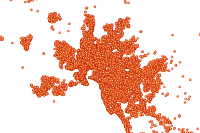

In [4]:
housing_data

In [5]:
housing_lyr = housing_data.layers[0]

In [6]:
housing_lyr

<FeatureLayer url:"https://services6.arcgis.com/SMX5BErCXLM7eDtY/arcgis/rest/services/Melbourne_Housing_Market/FeatureServer/0">

Using `from_layer` method, feature layers can be easiy read as sedf

In [7]:
import pandas as pd
sdf = pd.DataFrame.spatial.from_layer(housing_lyr)

In [8]:
sdf.head()

,Address,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,FID,GlobalID,...,Postcode,Price,Propertycount,Regionname,Rooms,SHAPE,SellerG,Suburb,Type,YearBuilt
0,124 Yarra St,2.0,4.0,210,0.0,Yarra City Council,07-05-2016,2.5,12,df7288eb-60b3-4933-ab13-0ebfa4b32782,...,3067,1876000.0,4019,Northern Metropolitan,3,"{""x"": 16141248.241381114, ""y"": -4551549.044634...",Nelson,Abbotsford,h,1910.0
1,78 Yarra St,1.0,2.0,105,1.0,Yarra City Council,16-07-2016,2.5,28,a55a44ec-743c-4db1-b8cd-0622c88d0cbd,...,3067,1176500.0,4019,Northern Metropolitan,3,"{""x"": 16140936.54680689, ""y"": -4551506.7784160...",LITTLE,Abbotsford,h,1890.0
2,52a William St,2.0,2.0,135,1.0,Yarra City Council,18-06-2016,2.5,36,fa53131f-4ace-4234-a607-08268ea36042,...,3067,1100000.0,4019,Northern Metropolitan,2,"{""x"": 16141070.130195843, ""y"": -4552323.955738...",Biggin,Abbotsford,h,2013.0
3,13 Etzel St,1.0,3.0,105,1.0,Moonee Valley City Council,10-12-2016,13.5,68,911c80a2-9deb-4d25-9c5b-06139dfc3412,...,3042,805000.0,3464,Western Metropolitan,3,"{""x"": 16127778.582995124, ""y"": -4540185.611807...",Nelson,Airport West,h,1950.0
4,145a Victory Rd,1.0,2.0,None,1.0,Moonee Valley City Council,13-08-2016,13.5,70,2847f0b3-c9e1-4068-a1bb-0c64ee186931,...,3042,440000.0,3464,Western Metropolitan,2,"{""x"": 16127823.110791445, ""y"": -4539622.690798...",Barry,Airport West,u,NaN


In [9]:
sdf.columns

Index(['Address', 'Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'CouncilArea',
       'Date', 'Distance', 'FID', 'GlobalID', 'Landsize', 'Lattitude',
       'Longtitude', 'Method', 'Postcode', 'Price', 'Propertycount',
       'Regionname', 'Rooms', 'SHAPE', 'SellerG', 'Suburb', 'Type',
       'YearBuilt'],
      dtype='object')

In [10]:
sdf.shape

(26881, 24)

In [11]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26881 entries, 0 to 26880
Data columns (total 24 columns):
Address          26881 non-null object
Bathroom         26605 non-null float64
Bedroom2         26614 non-null float64
BuildingArea     13733 non-null object
Car              26103 non-null float64
CouncilArea      26881 non-null object
Date             26881 non-null object
Distance         26881 non-null float64
FID              26881 non-null int64
GlobalID         26881 non-null object
Landsize         23021 non-null float64
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Method           26881 non-null object
Postcode         26881 non-null int64
Price            20993 non-null float64
Propertycount    26881 non-null int64
Regionname       26881 non-null object
Rooms            26881 non-null int64
SHAPE            26881 non-null geometry
SellerG          26881 non-null object
Suburb           26881 non-null object
Type             26881 non-

Select only the rows with not null values in price attribute.

# Exploratory data analysis and visualization

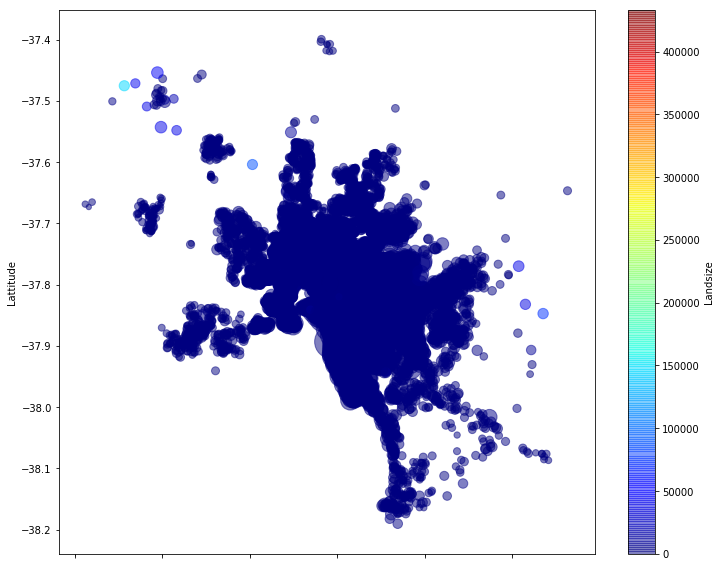

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
sdf.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.5, s=sdf["Price"]/10000,
         c="Landsize", cmap=plt.get_cmap("jet"), figsize=(12,10))

The plot shows each addresss of Melbourne by a point whose color varies with the landsize of the house and the size varies with the price of the house.The plot also depicts that most of the houses in Melbourne fall in the range 0-50000 square feet.Most of the houses are built in the latitude between-37.7 and -38.0 which could mean that this is possibly the ideal place for buying a house.

In [18]:
import seaborn as sns

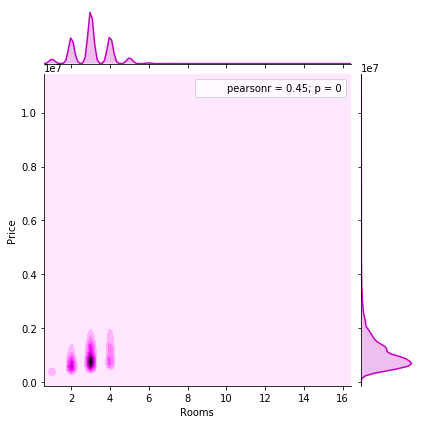

In [19]:
g = sns.jointplot(x=sdf.Rooms, y=sdf.Price, kind="kde", data=sdf, color="m")

This plot depicts relationship between two variables that is between rooms and price attribute.X-axis shows number of rooms are majorly in the range of 2-6 with 3 as the most common number of rooms in Melbourne.Y-axis shows the price range of houses shows a peak at 1,000,000.It also calculate a Pearson correlation coefficient(0.45) and the p-value for testing non-correlation(0).

In [20]:
sdf['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Western Victoria',
       'Eastern Victoria', 'Northern Victoria'], dtype=object)

[Text(0,0,'Northern Metropolitan'),
 Text(0,0,'Western Metropolitan'),
 Text(0,0,'Southern Metropolitan'),
 Text(0,0,'Eastern Metropolitan'),
 Text(0,0,'South-Eastern Metropolitan'),
 Text(0,0,'Eastern Victoria'),
 Text(0,0,'Northern Victoria'),
 Text(0,0,'Western Victoria')]

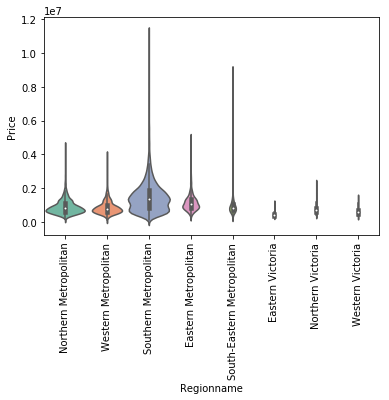

In [21]:
g = sns.violinplot(x=sdf.Regionname, y=sdf.Price, data=sdf, bw='silverman', width=1, scale="count",  palette="Set2", size=8);


g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)

The above Violin plot between Regionname and price draws a combination of box plot and kernel density estimate.Width of violin plot is affected by the count of houses in the same region. 

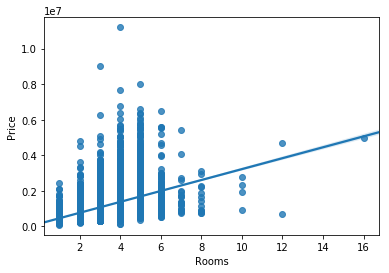

In [22]:
sns.regplot(x=sdf.Rooms, y=sdf.Price, data=sdf);

It plots the data and a linear regression model fit.It gives an estimate that number of rooms has a linear relationship with the price of the house.

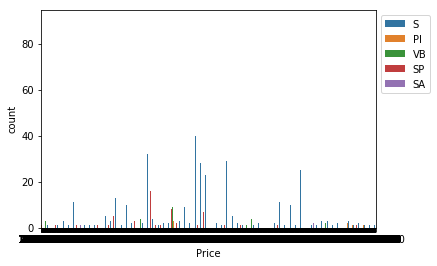

In [23]:
sns.countplot(x='Price', hue='Method', data=sdf)
plt.legend(bbox_to_anchor=(1,1))

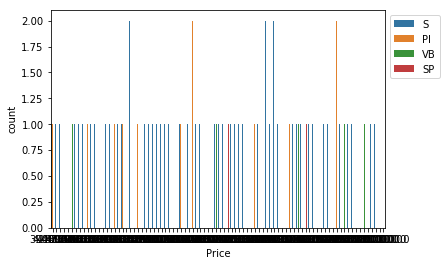

In [24]:
sns.countplot(x='Price', hue='Method', data=sdf.head(100))
plt.legend(bbox_to_anchor=(1,1))

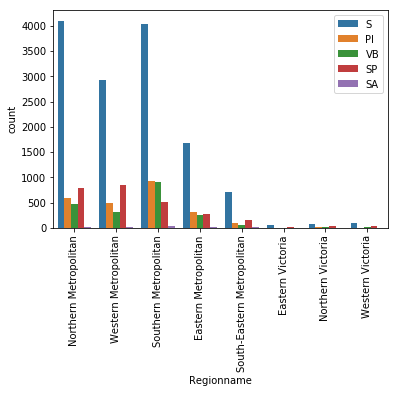

In [25]:
g = sns.countplot(x='Regionname', hue='Method', data=sdf)

g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)
plt.legend(bbox_to_anchor=(1,1))

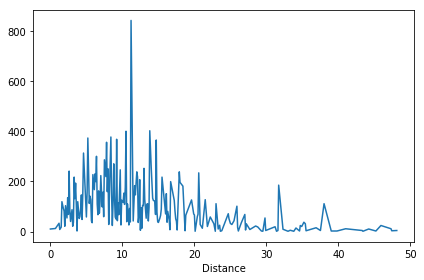

In [26]:
sdf.groupby(by='Distance').count()['Lattitude'].plot()
plt.tight_layout()

In [27]:
sdf.Landsize.max()

433014.0

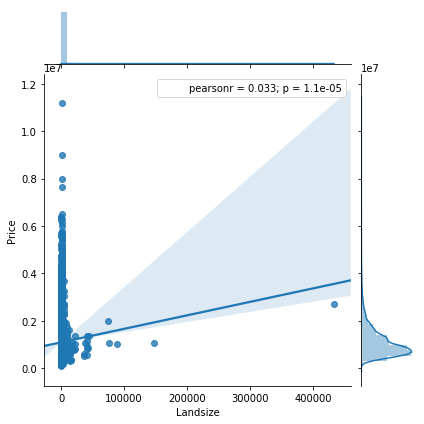

In [28]:
# Living Area vs Sale Price
sns.jointplot(x=sdf['Landsize'], y=sdf['Price'], kind='reg')

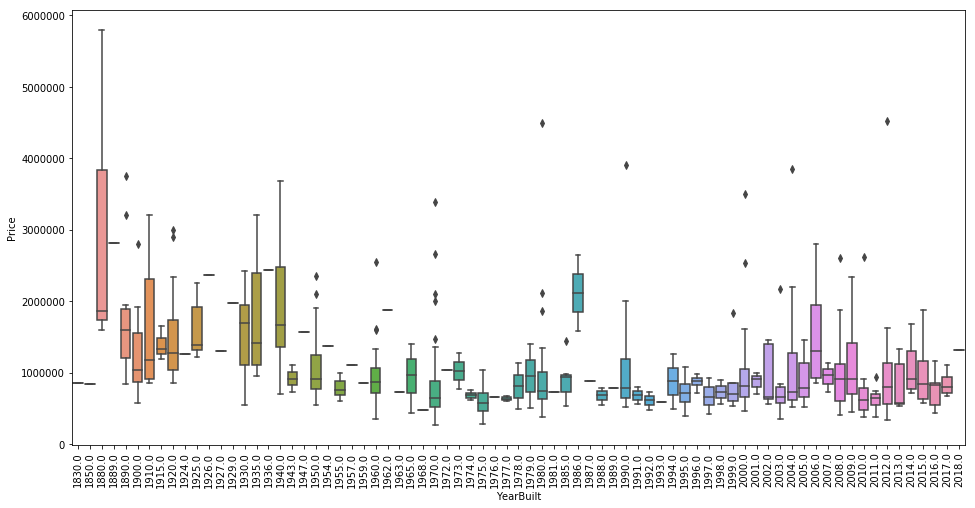

In [29]:
# Total Rooms vs Price
var = 'YearBuilt'
data = pd.concat([sdf['Price'], sdf[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Price", data=data.tail(1000));
plt.xticks(rotation=90);

Box plot shows how data is distributed in a particular year. 

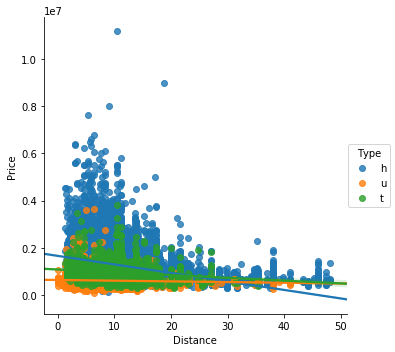

In [30]:
sns.lmplot(x='Distance', 
           y='Price',
          hue = 'Type',
          data = sdf)

# Predictive analysis

In [12]:
sdf.YearBuilt.min(),sdf.YearBuilt.max()

(1196.0, 2106.0)

In [13]:
sdf.YearBuilt.nlargest()

8126     2106.0
3901     2019.0
5999     2018.0
11845    2018.0
15969    2018.0
Name: YearBuilt, dtype: float64

In [14]:
sdf.YearBuilt.nsmallest()

4908     1196.0
16751    1800.0
13555    1820.0
26074    1830.0
571      1850.0
Name: YearBuilt, dtype: float64

In [15]:
x1 = sdf.YearBuilt.nlargest(1)

In [16]:
x2 = sdf.YearBuilt.nsmallest(1)

In [17]:
x1,x2

(8126    2106.0
 Name: YearBuilt, dtype: float64, 4908    1196.0
 Name: YearBuilt, dtype: float64)

As we see therre is mislabelling of data, so we would remove the row with YearBuilt 1196, 2106

In [18]:
sdf.drop(sdf[sdf['YearBuilt'] == x1.iloc[0]].index, inplace=True)

In [19]:
sdf.drop(sdf[sdf['YearBuilt'] == x2.iloc[0]].index, inplace=True)

In [20]:
sdf.shape

(26879, 24)

Now lets make a feature varible that has age of each house 

In [21]:
sdf['house_age'] = sdf.YearBuilt.max() - sdf['YearBuilt']

In [22]:
import numpy as np

In [23]:
sdf['age_cat'] = np.where(sdf['house_age']>=50,'old','modern')

now we can get an estimate of the percentage of NaN vontaing rows to see if we can delete rows with NaN values so as to not affect the size of our dataset.

In [24]:
total_nan_rows = sdf.isnull().sum()
total_rows = len(sdf)
perc_nan = total_nan_rows/total_rows*100

In [25]:
perc_nan

Address           0.000000
Bathroom          1.026824
Bedroom2          0.993341
BuildingArea     48.915510
Car               2.894453
CouncilArea       0.000000
Date              0.000000
Distance          0.000000
FID               0.000000
GlobalID          0.000000
Landsize         14.360653
Lattitude         0.000000
Longtitude        0.000000
Method            0.000000
Postcode          0.000000
Price            21.901856
Propertycount     0.000000
Regionname        0.000000
Rooms             0.000000
SHAPE             0.000000
SellerG           0.000000
Suburb            0.000000
Type              0.000000
YearBuilt        42.185349
house_age        42.185349
age_cat           0.000000
dtype: float64

In [26]:
sdf = sdf.dropna(axis=0)

In [27]:
sdf.Date.head()

0    07-05-2016
1    16-07-2016
2    18-06-2016
3    10-12-2016
5    15-10-2016
Name: Date, dtype: object

In [28]:
sdf['month'] = pd.DatetimeIndex(sdf['Date']).month

In [29]:
sdf.month.head()

0     7
1     7
2     6
3    10
5    10
Name: month, dtype: int64

### Checking correlations

In [32]:
import seaborn as sns

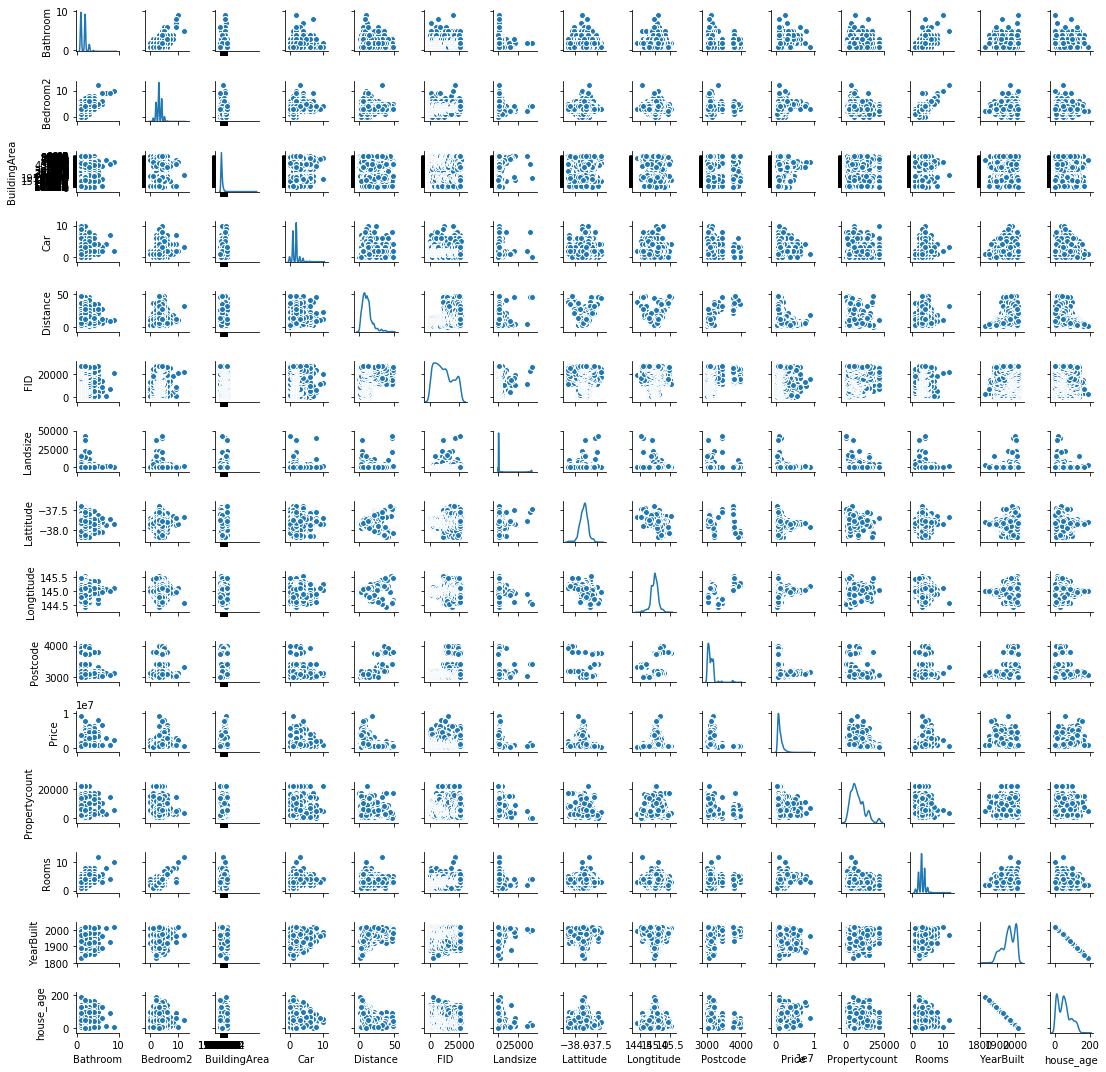

In [31]:
sns.pairplot(sdf, diag_kind="kde", size= 1)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

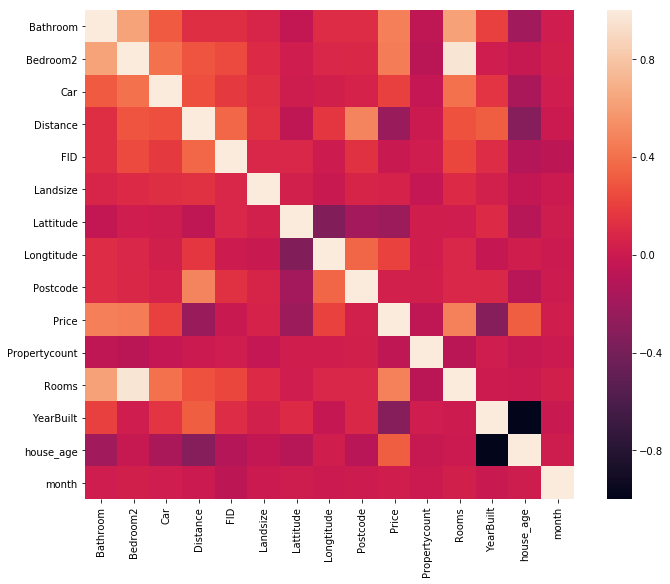

In [33]:
corrmat = sdf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

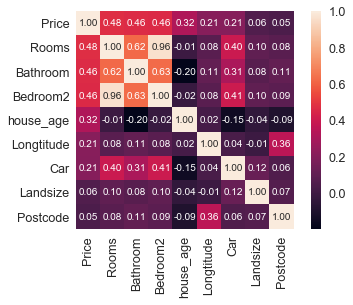

In [34]:
# Top 9 Heatmap
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(sdf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [35]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,Price
1,Rooms
2,Bathroom
3,Bedroom2
4,house_age
5,Longtitude
6,Car
7,Landsize
8,Postcode


In [36]:
y = sdf.Price

In [37]:
y.head()

0    1876000.0
1    1176500.0
2    1100000.0
3     805000.0
5     700000.0
Name: Price, dtype: float64

In [38]:
sdf.drop('Price', inplace=True, axis=1)

### Create dummies for categorical data

In [39]:
X_dummy = pd.get_dummies(sdf)

In [31]:
X_dummy.head()

,Bathroom,Bedroom2,Car,Distance,FID,Landsize,Lattitude,Longtitude,Postcode,Propertycount,...,Suburb_Wollert,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville,Type_h,Type_t,Type_u,age_cat_modern,age_cat_old
0,2.0,4.0,0.0,2.5,12,245.0,-37.8024,144.9993,3067,4019,...,0,0,0,0,0,1,0,0,0,1
1,1.0,2.0,1.0,2.5,28,138.0,-37.8021,144.9965,3067,4019,...,0,0,0,0,0,1,0,0,0,1
2,2.0,2.0,1.0,2.5,36,124.0,-37.8079,144.9977,3067,4019,...,0,0,0,0,0,1,0,0,1,0
3,1.0,3.0,1.0,13.5,68,0.0,-37.7217,144.8783,3042,3464,...,0,0,0,0,0,1,0,0,0,1
5,2.0,3.0,2.0,13.5,72,165.0,-37.7270,144.8870,3042,3464,...,0,0,0,0,0,0,1,0,1,0


In [40]:
X_dummy.drop(columns='SHAPE', inplace=True)

### Features scaling

In [41]:
X_scaled = (X_dummy-X_dummy.min())/(X_dummy.max()-X_dummy.min())

### Splitting train and test data

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

### Training and testing

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(n_estimators=200, 
                                  learning_rate=0.1, max_depth=5, random_state=0, loss='ls', warm_start =  True)
model.fit(x_train,y_train)
r2_score(y_test, model.predict(x_test))

0.8100878269478056

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(x_test))

173218.04660435062